In [5]:
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import pandas as pd
import os
import anndata as ad
import scipy as sp
import scvi

In [6]:
adata = sc.read_h5ad('../../results/nc_2021_Tabib/scrna.h5ad')

In [7]:
adata

AnnData object with n_obs × n_vars = 68249 × 33538
    obs: 'n_genes', 'sample', 'condition', 'batch'

In [9]:
'PECAM1' in adata.var_names

True

In [3]:
sc.pp.filter_cells(adata, min_genes=300)
sc.pp.filter_cells(adata, min_counts=500)

In [4]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [5]:
adata = adata[adata.obs.n_genes_by_counts < 5000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [6]:
adata

View of AnnData object with n_obs × n_vars = 37547 × 15540
    obs: 'n_genes', 'sample', 'condition', 'batch', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [7]:
adata.obs

,n_genes,sample,condition,batch,n_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAGAACA-1_0,1204,GSM4115868,CONTROL,0,4536.0,1204,4536.0,130.0,2.865961
AAACATTGTCTCAT-1_0,351,GSM4115868,CONTROL,0,1073.0,351,1073.0,1.0,0.093197
AAACGCACTAGACC-1_0,1597,GSM4115868,CONTROL,0,6108.0,1597,6108.0,150.0,2.455796
AAACTTGATACTTC-1_0,522,GSM4115868,CONTROL,0,1556.0,522,1556.0,16.0,1.028278
AAAGATCTCATTGG-1_0,1065,GSM4115868,CONTROL,0,4030.0,1065,4030.0,54.0,1.339950
...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAGTACCG-1_21,1785,GSM4115889,SSC,21,6363.0,1785,6363.0,148.0,2.325947
TTTGTCACAAGCCTAT-1_21,2692,GSM4115889,SSC,21,11295.0,2692,11295.0,265.0,2.346171
TTTGTCACACTCAGGC-1_21,2917,GSM4115889,SSC,21,11406.0,2917,11406.0,384.0,3.366649
TTTGTCAGTATGCTTG-1_21,1841,GSM4115889,SSC,21,7711.0,1841,7711.0,266.0,3.449617


In [8]:
adata.layers['counts'] = adata.X.copy()

In [9]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)

In [10]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)

2023-09-16 12:03:06.953011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


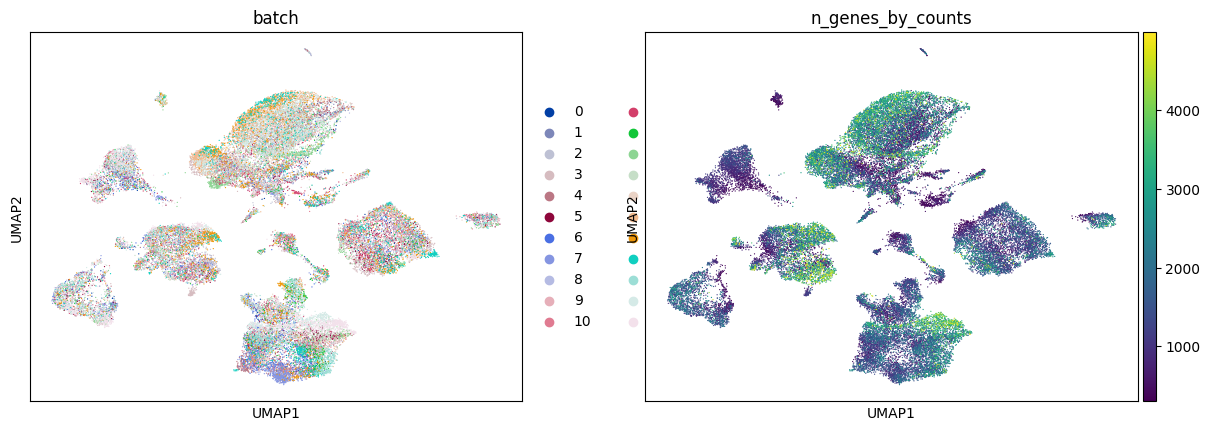

In [11]:
sc.pl.umap(adata, color=['batch', 'n_genes_by_counts'])

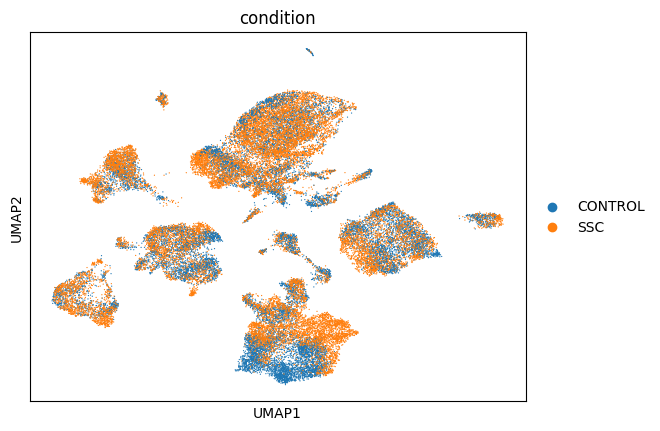

In [12]:
sc.pl.umap(adata, color=['condition'])

In [13]:
adata.write_h5ad('../../results/nc_2021_Tabib/scrna.integrated.h5ad')